# HR dashboard data analysis

In [6]:
library(tidyverse)
library(dplyr)
library(ggplot2)
library(broom)
library(tidymodels)
library(leaps)
# # install
# library(GGally)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ dials        1.2.0     ✔ rsample      1.2.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ recipes      1.0.8     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter

## Introduction

In the ever-evolving landscape of human resources, understanding the factors that influence salary is crucial for organizations striving to attract and retain top talent. Since salary is one of the highly esteemed incentives for attracting high-caliber talent, it is no surprise that the influencing factors of salary has been explored to great extent in previous literature. Prior studies have showed that the salary is related to many factors, education level, disciplines, employment factors, and student cadre roles impact graduates' likelihood of attaining "high salaries”(Wang et al., 2022)。 And the previous study has shown that the decline in females’ wages might be associated with women's childbearing (Gulati et al., 2022). In addition to that, age may have a positive correlation with salary, but high salary may cause psychological stress to employees (Badil and Raze, 2018). Studying what affects salaries is key for companies, helping with hiring, keeping employees having high satisfactory, and promoting fairness and diversity. Previous studies have found that there is salary inequality among employees of different levels and positions in an organization (Cheslock & Callie, 2015). It also supports talent development and makes for a positive workplace, benefiting both employees and the company.

The dataset HR Data from Kaggel was selected to investigate for this study. The data is collected as an accessible resource for those interested in the field of HR analytics. The dataset is particularly helpful for predicting employee turnover, evaluating employee performance, and uncovering factors affecting job satisfaction. A summary of the variables in the dataset is present below.

**Variables**

- Name: (Character type) Name of the employee
- Age: (Character type) The age of each employee, providing demographic insights.
- Gender: (Character type) Gender identity of employees, promoting diversity analysis.
- Projects.Completed: (Integer type) Number of projects completed by each employee during their time at the company.
- Productivity(%): (Integer type) Productivity rating of employee in percentage.
- Satisfaction.Rate(%): (Integer type) rating of satisfactory work done by employee in percentage.
- Feedback.Score: (Double type) Feedback value of employee.
- Department: (Character type) department he/she is working in at the company.
- Position: (Character type) position of the employee.
- Joining.Date: (Character type) Joining month and year of the employee.
- Salary: (Integer type) Salary of the employee in USD.

## Question

**Q. How does an employee's work experience (Projects.Completed, Position, Age, and Joining.Date) influence their Salary??**

This question can be considered both as an inferential question.
* We are assuming an association between the explanatory variables projects completed and productivity rating and the response variable salary
                    and form conclusions about all the company employees based on our sample dataset. 

As this data contains detailed information of about 200 employees, including 11 different variables, it provides us with sufficient data for us to make an informed 
analysis and draw conlusions to answer our question. In this study, our aim is to delve into the key factors concerning an employee's level of experience and how these factors influence their salary. The question I've chosen above is focused on inference, as we are attempting to make a generalized conclusion about the population of employees at this anonymized company; more specifically, the relation between how much they make per year and their relative experience measured by projects completed and position. In general, workplace dynamics vary from employee to employee based on their longevity and title within the company, so it will be interesting to see how pronounced this pheonomenon is in this particular company, and whether these results can be generalized to other companies. This research is designed to provide insights for businesses, enabling them to formulate more effective compensation strategies for better attracting and retaining crucial talent.

## Methods and results

In [67]:
hr <- read.csv("hr_dashboard_data.csv")
len <- nrow(hr)

head(hr)

,Name,Age,Gender,Projects.Completed,Productivity....,Satisfaction.Rate....,Feedback.Score,Department,Position,Joining.Date,Salary
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<int>
1,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
2,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
3,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
4,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
5,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133
6,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,48740


### Cleaning and Wrangling

**Changing column names to more efficient names for better readability**

* change all the column names to lower case
* remove special characters from column names
* shorten names if required

**Transforming Joining.Date to Service.Years - the number of years between joining date and the current date that denotes how long an employee has worked for the company - in order to make it numeric.**

In [68]:
new_col_name <- c("name", "age", "gender", "projects", "productivity", "satisfaction","feedback", "department", "position", "joiningdate", "serviceyears", "salary")
joining_date_object <- as.Date(paste0("01-", hr$Joining.Date), format = "%d-%b-%y")
current_date <- as.Date("2023-11-28")
serviceyears <- as.numeric(difftime(current_date, joining_date_object, units = "days") / 365)

hr <- add_column(hr, serviceyears, .before = "Salary")

names(hr) <- new_col_name
head(hr)

,name,age,gender,projects,productivity,satisfaction,feedback,department,position,joiningdate,serviceyears,salary
,<chr>,<int>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<int>
1,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,3.909589,63596
2,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,24.923288,112540
3,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,6.909589,66292
4,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,1.906849,38303
5,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,18.917808,101133
6,Jonathan King,24,Male,5,63,33,4.2,Sales,Junior Developer,Jan-21,2.906849,48740


**Checking for missing values in our dataset**

In [69]:
summary(hr)

     name                age           gender             projects    
 Length:200         Min.   :22.00   Length:200         Min.   : 0.00  
 Class :character   1st Qu.:26.00   Class :character   1st Qu.: 6.00  
 Mode  :character   Median :32.00   Mode  :character   Median :11.00  
                    Mean   :34.65                      Mean   :11.46  
                    3rd Qu.:41.00                      3rd Qu.:17.00  
                    Max.   :60.00                      Max.   :25.00  
  productivity    satisfaction       feedback      department       
 Min.   : 0.00   Min.   :  0.00   Min.   :1.000   Length:200        
 1st Qu.:23.00   1st Qu.: 25.75   1st Qu.:1.900   Class :character  
 Median :45.00   Median : 50.50   Median :2.800   Mode  :character  
 Mean   :46.76   Mean   : 49.94   Mean   :2.883                     
 3rd Qu.:70.00   3rd Qu.: 75.25   3rd Qu.:3.900                     
 Max.   :98.00   Max.   :100.00   Max.   :4.900                     
   position         

In [70]:
col_missing <- colSums(is.na(hr))
col_missing

name          age       gender     projects productivity satisfaction 
           0            0            0            0            0            0 
    feedback   department     position  joiningdate serviceyears       salary 
           0            0            0            0            0            0

Since there is no column for 'NA' values we can say that there aren't any missing values in the dataset.

In [77]:
#Eliminating columns that are irrelevant to our question
hr_req <- hr %>%
            select(age, projects, position, serviceyears, salary)
head(hr_req)

,age,projects,position,serviceyears,salary
,<int>,<int>,<chr>,<dbl>,<int>
1,25,11,Analyst,3.909589,63596
2,59,19,Manager,24.923288,112540
3,30,8,Analyst,6.909589,66292
4,26,1,Intern,1.906849,38303
5,43,14,Team Lead,18.917808,101133
6,24,5,Junior Developer,2.906849,48740


**Why did we eliminate these columns?**

In order to answer the proposed question above, we will select only the variables relevant to my analysis: 'age', 'projects', 'position', 'serviceyears' and 'salary'. As we are interested in covariates that define an employee's work experience based on longevity, and work completed, the variables we have chosen measure up to this standard, measuring the amount of time the employee has been with the company, how old an employee is, the number of projects they have completed at the company, and their seniority indicated by position title. We elected not to include any of the remaining covariates, as they were mostly demographic or performance-related factors. For now, we will exclude all the other variables in the dataset as well (Name, Gender, Productivity, Satisfaction.Rate, Feedback.Score, Department) as they cannot help answer the existing inference question, though this may be subject to change if we were to present a new question.

### Visualization

We've chosen to visualize my inference question with a color-encoded scatterplot, as it provides a clear and succinct representation of how 'Salary' varies in connection to 'Projects.Completed' while differentiating diverse 'Position' types. Within a single, clearly comprehensible graphic, we can simultaneously identify potential patterns or relationships across 'Salary' with both a continuous predictor in 'Projects.Completed' and a categorical predictor in 'Position'. Furthermore, we can also catch a glimpse into any multicollinearity between 'Position' and 'Projects.Completed'.

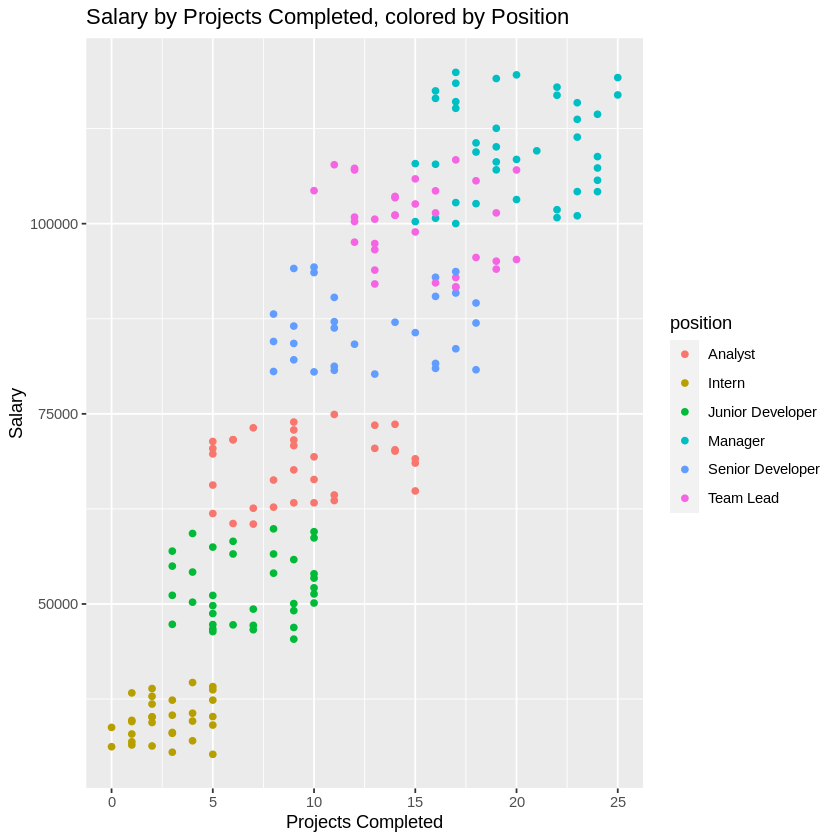

In [97]:
ggplot(hr, aes(x = projects, y = salary, color = position)) +
  geom_point() +
  labs(title = "Salary by Projects Completed, colored by Position", x = "Projects Completed", y = "Salary")

The distinct separation of data points into different color groups indicates that each 'Position' category has a rough segregation by 'Salary'. As illustrated above, there appears to be a positive association between 'Salary' and 'Position', with the 'Position' groups ranked by salary in the following order from highest to lowest: Manager, Team Lead, Senior Developer, Analyst, Junior Developer, and Intern. While levels such as Intern, Junior Developer, and Analyst are quite distinctly separated, there seems to be more overlap between Senior Developer and Team Lead, as well as between Team Lead and Manager.

However, it is not apparent if 'Position' has a substantial impact on the relationship between 'Projects.Completed' and 'Salary', as the points on the scatterplot are randomly distributed when distinguished by Position, suggesting that within the same position, there is not a significant effect on distinct salary ranges being influenced by project involvement.

Putting color aside, there appears to be a positive association between the number of projects completed ('Projects.Completed') and the salary ('Salary'). This positive relationship suggests that higher project involvement tends to associate with higher salaries, regardless of the position. This trend is consistent across all position categories displayed by the distinct color separations.

We will create a correlation matrix between all the input variables and then make a heatmap using the matrix to identify any possible mutlicollinearity and check if our input variables are actually independent. This might help us identify any strong correlation between our variables early on and help in deciding models in future. I believe that a heatmap is a very effective visual tool that is easy to interpret and communicate ideas amongst different group members, thus, I chose that for my visualization.

<h2> Choosing a Model </h2>
Due to the response variable, 'Salary', being continuous, possible methods that we've covered in this course would be regression methods such as Ordinary Least Squares (OLS), Ridge, and LASSO. After further consideration, it is apparent that ridge regression may be a bit more complex to implement using `glmnet()` with the presence of a categorical variable ('Position') that has 6 levels, as it requires manual one-hot encoding. Furthermore, ridge regression has not been explicitly demonstrated in the context of this course. Lastly, with only 4 total explanatory variables, it may not be necessary to further select variables using LASSO or introduce a penalty term with ridge regression due to less likelihood of overfitting or multicollinearity compared to one with more degrees of freedom. Thus, we will proceed with OLS, whose assumptions are satisfied and potential limitations are not a concern, after performing forward selection, which saves us from having to split our relatively small sample into a further validation set (which is needed to tune LASSO and ridge). <h3>Required Assumptions</h3>
First, we require that linear relations exist between each of the four covariates and 'Salary'. Next, we assume that the errors are independent of the response variable 'Salary'. Third, the conditional distribution of the error term (estimated by residuals) must be Normal. Lastly, the variance of the error term is equal for all values of the covariates (homoscedastic). It appears that all of these assumptions are satisfied.

## Implementation of a proposed model

First, we split the dataset into training and testing set using 60-40 split as we have a smaller dataset and want to ensure a robust evaluation of our model by allocating a large part to the test set.

In [84]:
set.seed(1234)
hr_split <- initial_split(hr_req, prop = 0.6, strata = salary)  #salary is our response variable and we want to maintain its proportion of levels in both sets
training_hr <- training(hr_split)
testing_hr <- testing(hr_split)

head(training_hr, 3)
nrow(training_hr)

head(testing_hr, 3)
nrow(testing_hr)

,age,projects,position,serviceyears,salary
,<int>,<int>,<chr>,<dbl>,<int>
1,23,4,Intern,2.906849,39670
2,30,7,Junior Developer,4.909589,49323
3,25,2,Intern,2.906849,35169


[1] 120

,age,projects,position,serviceyears,salary
,<int>,<int>,<chr>,<dbl>,<int>
1,25,11,Analyst,3.909589,63596
2,59,19,Manager,24.923288,112540
3,26,1,Intern,1.906849,38303


[1] 80

## Feature Selection

Next, since we have a total of 8 covariates when including the 5 dummy variables needed to encompass 'position', it might be helpful to perform forward selection to pick the combination of covariates that would yield the best performing model.

In [85]:
#Below, we implement forward selection using regsubsets() from library "leaps". 

hr_forward_sel <- regsubsets(
  x = salary ~ ., nvmax = 8,   #since we have 6 variables (including dummy variables for "position") in our training set
  data = training_hr,
  method = "forward",          #use forward selection to get a model with smaller number of input variables
)

hr_forward_summary <- summary(hr_forward_sel)
hr_forward_summary

Subset selection object
Call: regsubsets.formula(x = salary ~ ., nvmax = 8, data = training_hr, 
    method = "forward", )
8 Variables  (and intercept)
                         Forced in Forced out
age                          FALSE      FALSE
projects                     FALSE      FALSE
positionIntern               FALSE      FALSE
positionJunior Developer     FALSE      FALSE
positionManager              FALSE      FALSE
positionSenior Developer     FALSE      FALSE
positionTeam Lead            FALSE      FALSE
serviceyears                 FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         age projects positionIntern positionJunior Developer positionManager
1  ( 1 ) " " "*"      " "            " "                      " "            
2  ( 1 ) "*" "*"      " "            " "                      " "            
3  ( 1 ) "*" "*"      "*"            " "                      " "            
4  ( 1 ) "*" "*"      "*"            "*"                      

We select best model from all the 8 possible models based on goodness of fit. We create a tibble containing following columns:
*  **n_input_variables** the number of input variables in each selected model
* **RSQ** the R^2 of each model (explains proportion of variance in dependent variable predicted from independent variable)
* **RSS** the RSS of each model (Sum of squared residuals)
* **ADJ.R2** the adjusted R^2 of each model (adjusted according to predictors in the model)
* **Cp** the Cp of each model  (estimate prediction error of model, lower cp means better model)
* **BIC** the Bayesian Information Criterion of each model (used to balance the goodness of fit of a model)

In [86]:
hr_forward_summary_df <- tibble(
    n_input_variables = 1:8,
    RSQ = hr_forward_summary$rsq,
    RSS = hr_forward_summary$rss,
    ADJ.R2 = hr_forward_summary$adjr2,
    Cp = hr_forward_summary$cp,
    BIC = hr_forward_summary$bic,
)
hr_forward_summary_df

n_input_variables,RSQ,RSS,ADJ.R2,Cp,BIC
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7634030,20091739995,0.7613979,824.11291,-163.3926
2,0.8298766,14446818218,0.8269685,561.98129,-198.1853
3,0.8636195,11581388599,0.8600924,429.90493,-219.9268
4,0.9056104,8015531298,0.9023273,265.05485,-259.3015
5,0.9147441,7239902735,0.9110048,230.76240,-266.7268
6,0.9446426,4700934250,0.9417032,113.96149,-313.7609
7,0.9703565,2517314941,0.9685038,13.78772,-383.9216
8,0.9720648,2372250301,0.9700514,9.00000,-386.2566


Figure 1

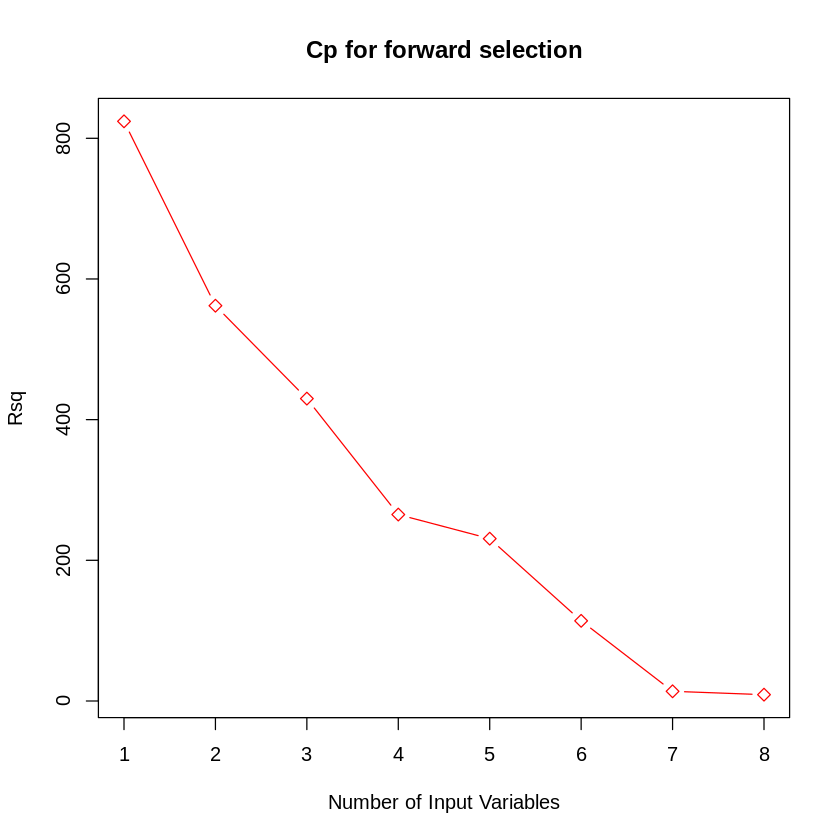

In [87]:
#Plotting cp of models selected by forward selection algorithm.

plot(summary(hr_forward_sel)$cp,
  main = "Cp for forward selection",
  xlab = "Number of Input Variables", ylab = "Rsq", type = "b", pch = 5,
  col = "red"
)

Figure 2

Based on Figures 1 and 2 above, it appears that the best-performing model for all assessed metrics is the full model with all 8 variables and keeping all covariates related to work experience: age, position, projects, and serviceyears.

In [88]:
# To obtain the names of the selected variables

cp_min = which.min(hr_forward_summary$cp) 
selected_var <- names(coef(hr_forward_sel, cp_min))[-1]
selected_var

[1] "age"                      "projects"                
[3] "positionIntern"           "positionJunior Developer"
[5] "positionManager"          "positionSenior Developer"
[7] "positionTeam Lead"        "serviceyears"

## Model Evaluation

Now that we have chosen our model, we proceed with OLS to evaluate the performance of our model. 

In [94]:
# Now, we train the selected models based on our results of forward selection

hr_red_OLS <- lm(salary ~ .,
  data = training_hr
)

hr_red_OLS


Call:
lm(formula = salary ~ ., data = training_hr)

Coefficients:
             (Intercept)                       age                  projects  
                 64830.2                     174.5                     -15.9  
          positionIntern  positionJunior Developer           positionManager  
                -32796.9                  -16077.2                   42609.3  
positionSenior Developer         positionTeam Lead              serviceyears  
                 19382.3                   32893.6                    -310.6  


In [95]:
# Now, we compute the rmse of the new predictive model using testing_subset

testing_hr$.pred_red <- hr_red_OLS %>%
  predict(testing_hr[, -9])       #since 3rd column has response variable

testing_hr <- testing_hr %>% mutate(pred_red_error = salary - .pred_red)
rmse_red <- sqrt(mean(testing_hr$pred_red_error^2)) %>% round(2)


# we store the computed reduced RMSE in a tibble
hr_RMSE_models <- tibble(
  Model = "OLS Reduced Regression",
  RMSE = rmse_red
  )

hr_RMSE_models

Model,RMSE
<chr>,<dbl>
OLS Reduced Regression,5163.26


Figure 3

In [96]:
tidy(hr_red_OLS, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),64830.24420,3076.35671,21.0737084,1.344500e-40,58734.238010,70926.25039
age,174.49392,86.11769,2.0262263,4.513940e-02,3.845978,345.14186
projects,-15.89821,148.91775,-0.1067583,9.151734e-01,-310.988683,279.19226
positionIntern,-32796.90647,1816.90734,-18.0509516,8.286401e-35,-36397.229651,-29196.58329
positionJunior Developer,-16077.23212,1502.75470,-10.6985073,8.752531e-19,-19055.040872,-13099.42337
positionManager,42609.32563,2852.45047,14.9377968,2.521395e-28,36957.004603,48261.64666
positionSenior Developer,19382.29205,1897.39999,10.2151850,1.141597e-17,15622.467295,23142.11680
positionTeam Lead,32893.55592,2253.41261,14.5972184,1.385775e-27,28428.268408,37358.84343
serviceyears,-310.60662,119.21988,-2.6053257,1.043660e-02,-546.848779,-74.36446


Figure 4

To assess whether an employee's salary is associated with their experience, I will conduct an inference test on the full model with null hypothesis $H_0: \beta_j = 0 \text{ (for } $j = 1, 2, ..., 8$ \text{)}$ vs. alternative hypothesis $H_1: \text{at least one } \beta_j \neq 0 \text{ (for } $j = 1, 2, ..., 8$ \text{)}$. At a 95% significance level, we fail to reject the null hypothesis that none of the covariates related to employee experience are statistically associated with 'Salary'. However, upon examination of the p-values in Figure 4, 'projects' isn't statistically significant as its p-value is less than alpha = 0.05, while all levels of 'Position' are statistically significant with very small p-values, and both 'age' and 'serviceyears' fit under this threshold as well. These results suggest that 'Position' on its own likely accounts for much of the variance explained in 'Salary', with help from 'age' and 'serviceyears' and that there may be some multicollinearity or overfitting from the existing model that requires further examination and potential variable selection.

## Discussion

The model with age, projects, position (dummy variables), and service years as input variables performs the best based on the metrics provided. As the number of input variables increases, there is an improvement in R-squared, indicating better explanation of salary variance. The Cp and BIC values are minimized in the model with eight input variables, suggesting a good balance between model fit and simplicity. The model seems to have a strong explanatory power, with a high R-squared value of 0.972. In conclusion, the selected model with age, projects, position, and service years appears to be a robust choice for predicting employee salaries, striking a balance between explanatory power and model simplicity.

By leveraging this model, organizations can tailor compensation strategies, enhance retention, and optimize overall performance, capitalizing on insights into key salary determinants.

To enhance the model accuracy, incorporating additional variables like tenure or educational qualifications could offer deeper insights. Exploring interactions between factors and integrating more diverse data sources would strengthen the model's predictive capability. As the dataset grows or includes external market data, the model's robustness, and ability to capture salary variations within the workforce context will improve. 

The implications of these findings are substantial for human resource management and organizational dynamics. Understanding that age, projects, position, and service years are pivotal factors in determining salary levels allows companies to tailor compensation structures more effectively. Emphasizing these factors can potentially lead to a more engaged and motivated workforce, fostering a positive work environment while optimizing productivity. Moreover, this knowledge can guide HR policies, performance evaluations, and potentially reduce turnover rates by aligning salary structures more closely with employee contributions and contentment.

This study could lead to future research like exploring how other external factors, industry trends or economic conditions, interact with these key internal indicators could provide a more holistic view. Additionally, investigating the impact of these factors across diverse industries or within specific job roles might uncover nuanced differences in salary determinants.




## Reference

Atreya, A. (2023, August 2). Employee productivity and satisfaction HR data. Kaggle. https://www.kaggle.com/datasets/adityaab1407/employee-productivity-and-satisfaction-hr-data/ 

B, B. ., & Ur Rehman, R. . (2018). Association of Working Experience and Salary with Occupational Stress among Nurses. *Journal of the Dow University of Health Sciences (JDUHS)*, *12*(1), 13–16. Retrieved from https://jduhs.com/index.php/jduhs/article/view/1377

Cheslock, J. J., & Callie, T. M. (2015). Changing salary structure and faculty composition within business schools: Differences across sectors and state funding levels. Economics of Education Review, 49, 42-54. https://doi.org/10.1016/j.econedurev.2015.08.001

Gulati, M., Korn, R. M., Wood, M. J., Sarma, A., Douglas, P. S., Singh, T., Merz, N. B., Lee, J., Mehran, R., Andrews, O. A., & Williams, J. C. (2022). Childbearing among women cardiologists: The interface of experience, impact, and the law. *Journal of the American College of Cardiology, 79*(11), 1076-1087. https://doi.org/10.1016/j.jacc.2021.12.034

Wang, P., Liao, W., Zhao, Z., & Miu, F. (2022). Prediction of factors influencing the starting salary of college graduates based on machine learning. *Wireless Communications and Mobile Computing*, *2022*, 1–14. https://doi.org/10.1155/2022/7845545